In [37]:
    import importnb
    with importnb.Notebook():
        try: from .schemas import String, JsonSchema, discover
        except: from schemas import String, JsonSchema, discover

In [28]:
    class Uri(String, format='uri'): 
        def get(x, *args, **kwargs): return __import__('requests').get(x, *args, **kwargs)
        def text(x): return Uri.get(x).text
        def json(x): return get(x).json()

In [29]:
    class Arrow:
        def time(x: String) -> 'arrow.Arrow': return __import__('arrow').Arrow(x)
    class Date(Arrow, String, format='date'): ...
    class Datetime(Arrow, String, format='date-time'): ...
    class Time(Arrow, String, format='time'): ...

In [30]:
    class Email(String, format='email'): ...
    class JsonPointer(String, format='json-pointer'): ...

In [31]:
    class Markdown(String, pattern=r"^[#|>*|+|-]+\s+"): 
        def display(x): return __import__('IPython').display.Markdown(x)
        def _repr_mimebundle_(x, include=None, exclude=None):
            return __import__('IPython').get_ipython().display_formatter.format(x.display())

    class GraphViz(String, pattern=r"^[di]?graph\s{.+}"): 
        def graphviz(x): return __import__('graphviz').Source(x)
        def _repr_mimebundle_(x, include=None, exclude=None):
            return __import__('IPython').get_ipython().display_formatter.format(x.graphviz())

In [32]:
    class File(String, format='file-path'): 
        def __init__(x, *a, **k): assert __import__('pathlib').Path(x).exists()
        def read_text(x): return String.discover(__import__('pathlib').Path(x).read_text())
        def read_json(x): 
            with open(x) as file: object = __import__('ujson').load(file)
            return object
        def parse(x, *args, **kwargs): return discover(__import__('anyconfig').load(x, *args, **kwargs))

In [33]:
    class Test(__import__('unittest').TestCase):
        def test_instances(x):
            assert isinstance('https://api.github.com', Uri)
            assert not isinstance('#xx', Markdown)
            assert isinstance('# xx', Markdown)
            assert isinstance('strings.ipynb', File)

In [34]:
    def load_tests(loader, tests, ignore): tests.addTests(doctest.DocTestSuite(importlib.import_module(__name__), optionflags=doctest.ELLIPSIS)); return tests
    if __name__ == '__main__': 
        import unittest, pytest, jsonschema, importlib, doctest
        unittest.main(argv=' ', exit=False, verbosity=1)

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


[NbConvertApp] Converting notebook strings.ipynb to script
[NbConvertApp] Writing 2739 bytes to strings.py
reformatted strings.py
All done! ✨ 🍰 ✨
1 file reformatted.
parsing /Users/tonyfast/xxxxx/tonyfast/jschema/strings.py...


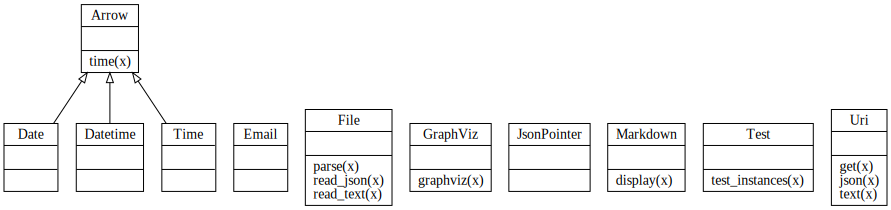

In [38]:
    if __name__ == '__main__': 
        !jupyter nbconvert --to script strings.ipynb
        !black strings.py
        !pyreverse strings -osvg -pstrings
        display(__import__('IPython').display.SVG('classes_strings.svg'))        
        !rm strings.py classes_strings.svg
